<a href="https://colab.research.google.com/github/santhosh3760/MachineLearningProjects/blob/main/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing the dataset

In [11]:
df= pd.read_csv('Position_Salaries.csv')
X=df.iloc[:,1:2].values
y=df.iloc[:,-1].values

In [12]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [13]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Reshaping y :
since the standard scalar function which is used for feature scaling accepts 2-d arrays as input arguments, so as y is 1d array now, we have to reshape it to 2 d array


In [17]:
y = y.reshape(len(y),1)

In [18]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy= StandardScaler()
X=scx.fit_transform(X)
y=scy.fit_transform(y)

In [22]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [21]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [33]:
from sklearn.svm import SVR
reg= SVR(kernel = 'rbf')

reg.fit(X,y)








/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

Inverse scaling, to get the actual value from predicted value which is a scaled form pf the output feature.


In [35]:
y_pred=reg.predict(scx.transform([[6.5]]))
print(y_pred)
y_org=scy.inverse_transform([y_pred])
print(y_org)


[-0.27861589]
[[170370.0204065]]


## Visualising the SVR results

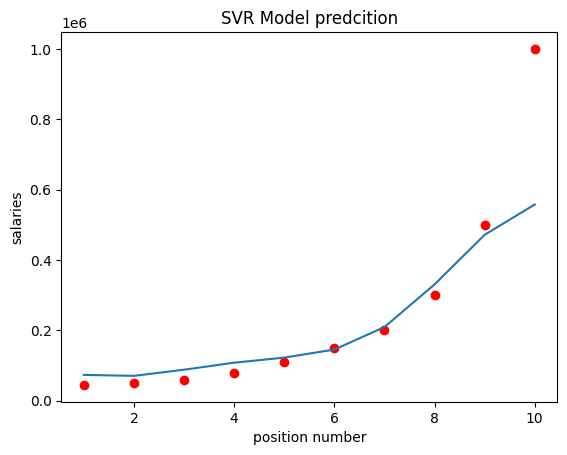

In [38]:
plt.scatter(scx.inverse_transform(X),scy.inverse_transform(y), color='red')
plt.plot(scx.inverse_transform(X), scy.inverse_transform(reg.predict(X).reshape(-1,1)))
plt.xlabel('position number')
plt.ylabel('salaries')
plt.title('SVR Model predcition')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)